In [8]:
import requests
import pandas as pd

# 1. Extraer datos desde Open-Meteo API
lat, lon = -12.0464, -77.0428  # Lima, Perú
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m&timezone=America/Lima"

response = requests.get(url)
data = response.json()

# Convertir a DataFrame
df_temp = pd.DataFrame({
    'time': data['hourly']['time'],
    'temperature_2m': data['hourly']['temperature_2m']
})

# 2. Convertir columna 'time' a datetime
df_temp['time'] = pd.to_datetime(df_temp['time'], errors='coerce')

# Verificar si hubo errores
if df_temp['time'].isnull().any():
    print("Advertencia: Algunos valores de 'time' no se pudieron convertir correctamente.")

df_temp


,time,temperature_2m
0,2025-03-28 00:00:00,21.3
1,2025-03-28 01:00:00,21.0
2,2025-03-28 02:00:00,20.6
3,2025-03-28 03:00:00,20.3
4,2025-03-28 04:00:00,20.1
...,...,...
163,2025-04-03 19:00:00,21.4
164,2025-04-03 20:00:00,20.8
165,2025-04-03 21:00:00,20.5
166,2025-04-03 22:00:00,20.3


In [12]:
# 2. Indicadores de calidad de datos
indicadores_dama = {
    # Completitud
    'Completitud - Total registros': len(df_temp),
    'Completitud - Registros con temperatura nula': df_temp['temperature_2m'].isnull().sum(),
    'Completitud - % de nulos': round(df_temp['temperature_2m'].isnull().mean() * 100, 2),

    # Unicidad
    'Unicidad - Tiempos únicos': df_temp['time'].nunique(),
    'Unicidad - Duplicados por fecha': df_temp.duplicated('time').sum(),

    # Consistencia
    'Consistencia - Temperaturas < -90°C': (df_temp['temperature_2m'] < -90).sum(),
    'Consistencia - Temperaturas > 60°C': (df_temp['temperature_2m'] > 60).sum(),

    # Validez
    'Validez - Tipo correcto (datetime)': pd.api.types.is_datetime64_any_dtype(df_temp['time']),
    'Validez - Temperatura mínima': df_temp['temperature_2m'].min(),
    'Validez - Temperatura máxima': df_temp['temperature_2m'].max(),

    # Actualidad / Puntualidad
    'Actualidad - Última fecha disponible': df_temp['time'].max(),
    'Actualidad - Fecha de extracción': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),

    # Trazabilidad
    'Trazabilidad - Fuente': 'Open-Meteo API (https://open-meteo.com)',
    'Trazabilidad - Zona horaria': 'America/Lima (UTC-5)',
    'Trazabilidad - Responsable': 'Alumno - Giancarlos Nuñez'
}

# Mostrar indicadores
print("\nIndicadores de Calidad (alineados a DAMA-DMBOK):")
for k, v in indicadores_dama.items():
    print(f" - {k}: {v}")



Indicadores de Calidad (alineados a DAMA-DMBOK):
 - Completitud - Total registros: 168
 - Completitud - Registros con temperatura nula: 0
 - Completitud - % de nulos: 0.0
 - Unicidad - Tiempos únicos: 168
 - Unicidad - Duplicados por fecha: 0
 - Consistencia - Temperaturas < -90°C: 0
 - Consistencia - Temperaturas > 60°C: 0
 - Validez - Tipo correcto (datetime): True
 - Validez - Temperatura mínima: 19.0
 - Validez - Temperatura máxima: 29.7
 - Actualidad - Última fecha disponible: 2025-04-03 18:00:00-05:00
 - Actualidad - Fecha de extracción: 2025-03-28 21:02:34
 - Trazabilidad - Fuente: Open-Meteo API (https://open-meteo.com)
 - Trazabilidad - Zona horaria: America/Lima (UTC-5)
 - Trazabilidad - Responsable: Alumno - Giancarlos Nuñez


Se han aplicado métricas asociadas a las dimensiones de calidad propuestas por el marco DAMA-DMBOK. Estas dimensiones permiten medir 
si los datos son adecuados para su propósito, están completos, actualizados, trazables y sin errores lógicos. Esto forma parte de una 
gestión proactiva de la calidad,  alineada a prácticas profesionales en gobierno de datos

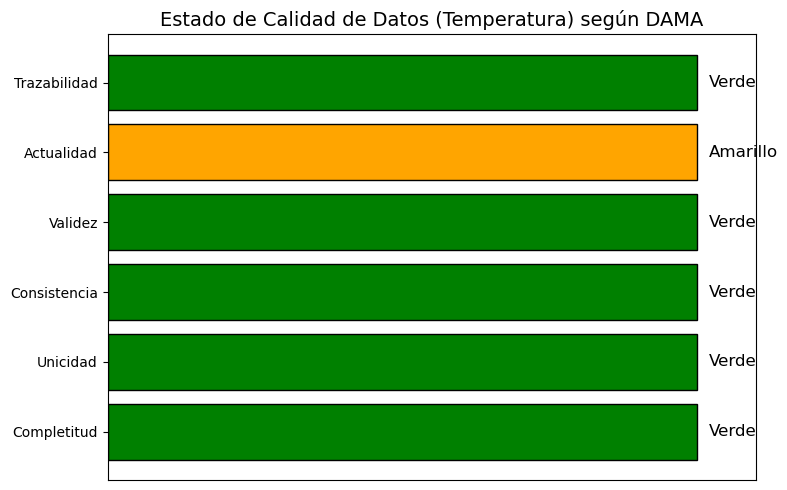

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

estado_dama = {
    'Completitud': 'Verde',     
    'Unicidad': 'Verde',        
    'Consistencia': 'Verde',    
    'Validez': 'Verde',         
    'Actualidad': 'Amarillo',   
    'Trazabilidad': 'Verde'     
}

df_estado = pd.DataFrame({
    'Dimensión': list(estado_dama.keys()),
    'Estado': list(estado_dama.values())
})

color_map = {'Verde': 'green', 'Amarillo': 'orange', 'Rojo': 'red'}
df_estado['Color'] = df_estado['Estado'].map(color_map)

plt.figure(figsize=(8, 5))
bars = plt.barh(df_estado['Dimensión'], [1]*len(df_estado), color=df_estado['Color'], edgecolor='black')

plt.xlim(0, 1.1)
plt.xticks([])
plt.title('Estado de Calidad de Datos (Temperatura) según DAMA', fontsize=14)

for i, bar in enumerate(bars):
    plt.text(1.02, bar.get_y() + bar.get_height()/2, df_estado['Estado'][i], va='center', fontsize=12)

plt.tight_layout()
plt.show()